In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline  
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [2]:
df = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI Sales Cross Selling and UpSelling\data\dataset\Credit & Collection Series.csv")
df.head()

,Unnamed: 0,company_ID,company_name,company_pic,company_address,company_phone,company_email,company_field,transaction_date,level_training_process,...,interest_in_discount_program,training_ID,trainer_name,training_total_meetings,training_price,discount_training,training_type,training_name,cross_selling,upselling
0,0,P0001,Tribakti Inspektama,Lasmanto Pratiwi,"Jalan Cihampelas No. 282\nPontianak, Kalimanta...",+62 (183) 655 1415,muhammadnasyidah@example.org,Aktivitas Keuangan dan Asuransi,2020-01-01,5,...,5,B0001,Ibun,17,6000000.0,50,Credit & Collection Series,Mengelola NPL dengan Early Warning System (EWS),Manajemen Resiko APU & PPT bagi Staff Perbanka...,Mengelola NPL dengan Early Warning System (EWS)
1,1,P0002,Bank Bukopin Syariah,Puti Gina Napitupulu,"Jalan Tubagus Ismail No. 02\nSukabumi, BB 74318",(097) 773 7113,januarkamaria@example.net,Aktivitas Badan Internasional Dan Badan Ekstra...,2020-01-02,5,...,5,B0002,Reza,17,6000000.0,50,Credit & Collection Series,Mengelola NPL dengan Early Warning System (EWS),Manajemen Resiko APU & PPT bagi Staff Perbanka...,Mengelola NPL dengan Early Warning System (EWS)
2,2,P0003,Bank Bukopin Syariah,"Karna Purwanti, S.I.Kom","Gg. Pelajar Pejuang No. 660\nJambi, Jambi 60449",+62 (0801) 007-5669,rprasetyo@example.net,"Pengadaan Listrik, Gas, Uap/Air Panas Dan Udar...",2020-01-03,5,...,5,B0003,Ibun,14,6000000.0,50,Credit & Collection Series,Mengelola NPL dengan Early Warning System (EWS),Manajemen Resiko APU & PPT bagi Staff Perbanka...,Mengelola NPL dengan Early Warning System (EWS)
3,3,P0004,Kementrian Agama,Tania Yolanda,"Jl. Cihampelas No. 8\nTual, ST 59647",+62-0247-253-2150,iswahyudiraisa@example.net,Konstruksi,2020-01-04,5,...,5,B0004,Reza,17,4800000.0,60,Credit & Collection Series,Mengelola NPL dengan Early Warning System (EWS),Graphology & Powerful Interview for Credit Ana...,Mengelola NPL dengan Early Warning System (EWS)
4,4,P0005,M3kom,Zaenab Anggriawan,"Gang Moch. Ramdan No. 083\nPayakumbuh, SS 13214",(025) 406 2520,mulyono67@example.com,Informasi Dan Komunikasi,2020-01-05,5,...,5,B0005,Haris,17,6000000.0,50,Credit & Collection Series,Mengelola NPL dengan Early Warning System (EWS),Manajemen Resiko APU & PPT bagi Staff Perbanka...,Manajemen Resiko APU & PPT bagi Staff Perbanka...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 33 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   5000 non-null   int64  
 1   company_ID                                   5000 non-null   object 
 2   company_name                                 5000 non-null   object 
 3   company_pic                                  5000 non-null   object 
 4   company_address                              5000 non-null   object 
 5   company_phone                                5000 non-null   object 
 6   company_email                                5000 non-null   object 
 7   company_field                                5000 non-null   object 
 8   transaction_date                             5000 non-null   object 
 9   level_training_process                       5000 non-null   int64  
 10  

In [4]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i] = df[i].astype("category")


In [5]:
# Preprocessing untuk fitur kategori
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder())
])

# Preprocessing untuk fitur numerik
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

numeric_features = ["level_training_process", "possibility_of_purchasing_the_same_training", "satisfaction",
                    "frequency_engagement"]

categorical_features = ["group", "communication_channel", "complaints", "communication_quality", 
                        "tren_mode_factor", "training_name"]

drop_features = ["Unnamed: 0", "company_ID", "company_name", "company_pic", "company_address", "company_phone", "company_email", "company_field",
                 "transaction_date", "purchasing_time_patterns", "number_of_participants", "total_payment", "brand_sustainability", "rating_training",
                 "interest_in_discount_program", "training_ID", "training_total_meetings", "training_price", "discount_training", "training_type",
                 "trainer_name", "upselling"]

# Gabungkan transformer dengan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('drop', 'drop', drop_features)
    ],
    remainder="passthrough"
    )

In [6]:
X = df.drop("cross_selling", axis=1)
y = df["cross_selling"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

pkl = joblib.load(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI Sales Cross Selling and UpSelling\modelling\classification\cross_selling\model_save\model2.pkl")
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("models", pkl)
])
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000091 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 125
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 10
[LightGBM] [Info] Start training from score -2.103734
[LightGBM] [Info] Start training from score -2.101687
[LightGBM] [Info] Start training from score -2.024953
[LightGBM] [Info] Start training from score -2.111965
[LightGBM] [Info] Start training from score -2.067513
[LightGBM] [Info] Start training from score -2.105786
[LightGBM] [Info] Start training from score -2.075450
[LightGBM] [Info] Start training from score -2.047943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['level_training_process',
                                                   'possibility_of_purchasing_the_same_training',
                                                   'satisfaction',
                                                   'frequency_engagement']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent...
                                                   'transaction_date',
                                                   'purchasing_time_patterns',
                                                   'number_of_participants',
                                                   'total_payment',
                                                   'brand_sustainability',
                                                   'rating_training',
                                                   'interest_in_discount_program',
                                                   'training_ID',
                                                   'training_total_meetings',
                                                   'training_price',
                                                   'discount_training',
                                                   'training_type',
                                                   'trainer_name',
                                                   'upselling'])])),
                ('models',
                 LGBMClassifier(learning_rate=0.01, max_depth=3,
                                num_leaves=15))])

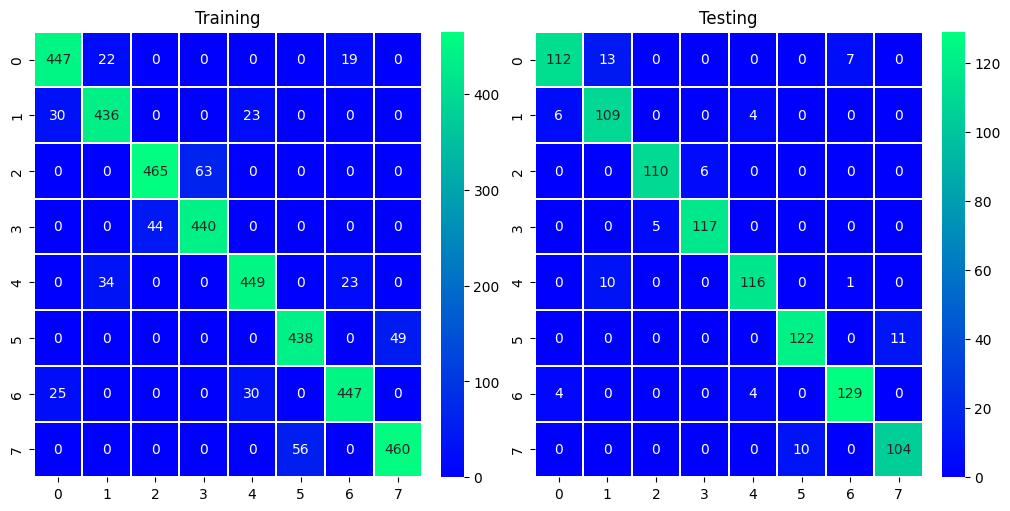

In [7]:
y_pred = model.predict(X_test)
fig, ax = plt.subplots(1, 2, figsize=(10, 5), layout="constrained")
sns.heatmap(confusion_matrix(y_train, model.predict(X_train)), annot=True, fmt="d", linecolor="white", linewidths=0.2, cmap="winter", ax=ax[0])
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", linecolor="white", linewidths=0.2, cmap="winter", ax=ax[1])

ax[0].set_title("Training")
ax[1].set_title("Testing")
plt.show()


In [8]:
print(classification_report(y_test, y_pred))

                                                                                       precision    recall  f1-score   support

                                                   Debt Collection Strategy & Tactics       0.92      0.85      0.88       132
                                   Graphology & Powerful Interview for Credit Analyst       0.83      0.92      0.87       119
       How to detect & prevent application fraud in Digital Era for Banking & Fintech       0.96      0.95      0.95       116
                                                        Managing Corporate Collection       0.95      0.96      0.96       122
Manajemen Resiko APU & PPT bagi Staff Perbankan, Multifinance, sekuritas dan asuransi       0.94      0.91      0.92       127
                                      Mengelola NPL dengan Early Warning System (EWS)       0.92      0.92      0.92       133
                                               Restrukturisasi Kredit for SME Lending       0.94      0.94    

In [9]:
a = model.predict_proba(X_test.iloc[-1:, :])
b = ["Debt Collection Strategy & Tactics", "Graphology & Powerful Interview for Credit Analyst",
     "How to detect & prevent application fraud in Digital Era for Banking & Fintech", "Managing Corporate Collection",
     "Manajemen Resiko APU & PPT bagi Staff Perbankan, Multifinance, sekuritas dan asuransi",
     "Mengelola NPL dengan Early Warning System (EWS)", "Restrukturisasi Kredit for SME Lending", "Teknik Penyelesaian Kredit & Pemasaran AYDA yang Efektif"]

for i, j in zip(b, a.ravel()):
    print(i, f"{j*100:.2f}%")

Debt Collection Strategy & Tactics 4.11%
Graphology & Powerful Interview for Credit Analyst 3.56%
How to detect & prevent application fraud in Digital Era for Banking & Fintech 68.90%
Managing Corporate Collection 8.82%
Manajemen Resiko APU & PPT bagi Staff Perbankan, Multifinance, sekuritas dan asuransi 3.67%
Mengelola NPL dengan Early Warning System (EWS) 3.54%
Restrukturisasi Kredit for SME Lending 3.66%
Teknik Penyelesaian Kredit & Pemasaran AYDA yang Efektif 3.74%


In [10]:
model.predict(X_test.iloc[-1:, :])

array(['How to detect & prevent application fraud in Digital Era for Banking & Fintech'],
      dtype=object)

In [11]:
y_test.iloc[-1]

'How to detect & prevent application fraud in Digital Era for Banking & Fintech'